## Logistic Regression 

In [51]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score



In [2]:
reviews_df = pd.read_csv('fake reviews dataset.csv')

reviews_df['labels'] = [1 if label=='OR' else 0 for label in reviews_df['label']]

reviews_df.head()



,category,rating,label,text_,labels
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor...",0
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I...",0
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...,0
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i...",0
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...,0


In [3]:
# vectorizing the text

vectorizer = TfidfVectorizer(stop_words='english', max_df=0.2)
#vectorizer = CountVectorizer(stop_words='english', max_df=0.7)
X = vectorizer.fit_transform(reviews_df['text_'])
y = reviews_df['labels']

# Stratified kfold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)



In [4]:
#train
logreg = LogisticRegression()
non_gpt_accuracies = []


for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    logreg = LogisticRegression(C=1e5, max_iter=1000)
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy:', accuracy)
    non_gpt_accuracies.append(accuracy)



/Users/antoniocaceres/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7869420056881414


/Users/antoniocaceres/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7810065537282057


/Users/antoniocaceres/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.783452881523621


/Users/antoniocaceres/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7812268117734356
Accuracy: 0.801756121691813


/Users/antoniocaceres/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [5]:
print('Average Accuracy:', np.mean(non_gpt_accuracies))

Average Accuracy: 0.7868768748810433


## Testing with GPT-4 data

In [6]:
test_df = pd.read_csv('generated_amazon_reviews.csv')
print(test_df.head())

corpus_test = test_df.Review

X = vectorizer.transform(corpus_test)
X_test = X.toarray()
y_actual = np.zeros(len(X_test))



                                              Review
0  dedigned wisdom utah coachman muffins autofocu...
1  highclere loretta flapper viewpoints texts cri...
2  stunning barrington mens x99 covered eyebrows ...
3  tauntan violently unnerving presents yes glori...
4  reich wretched allday sarcastic lasagna please...


In [7]:
pred_labels = logreg.predict(X_test)
pred_labels
print('Accuracy:', accuracy_score(y_actual, pred_labels))

Accuracy: 0.06


## now with CHAT-GPT training dataset

In [8]:
final_df = pd.read_csv('final_reviews.csv')
X_final = vectorizer.fit_transform(final_df['text_'])
y_final = final_df['labels']

final_logreg = LogisticRegression(C=1e5, max_iter=1000)


final_accuracies = []

for train_index, test_index in skf.split(X_final, y_final):
    X_train, X_test = X_final[train_index], X_final[test_index]
    y_train, y_test = y_final[train_index], y_final[test_index]
    
    final_logreg.fit(X_train, y_train)
    y_pred = final_logreg.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print('Fold Accuracy:', accuracy)
    final_accuracies.append(accuracy)


/Users/antoniocaceres/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold Accuracy: 0.7946086311363917


/Users/antoniocaceres/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold Accuracy: 0.7865710399406455


/Users/antoniocaceres/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold Accuracy: 0.7906257729408854


/Users/antoniocaceres/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold Accuracy: 0.7870393272322532
Fold Accuracy: 0.7901310907741775


/Users/antoniocaceres/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
print('Final Dataset Accuracy:', np.mean(final_accuracies))


Final Dataset Accuracy: 0.7897951724048707


In [10]:
X_test = vectorizer.transform(corpus_test).toarray()
final_pred_labels = final_logreg.predict(X_test)
final_pred_labels

print('Accuracy:', accuracy_score(y_actual, final_pred_labels))

Accuracy: 0.12


# Feature Analysis 

In [38]:
real_text = final_df[final_df['labels']==1]['text_']
fake_text = final_df[final_df['labels']==0]['text_']

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]


top_words_real = get_top_n_words(real_text, n=15)
top_words_fake = get_top_n_words(fake_text, n=15)

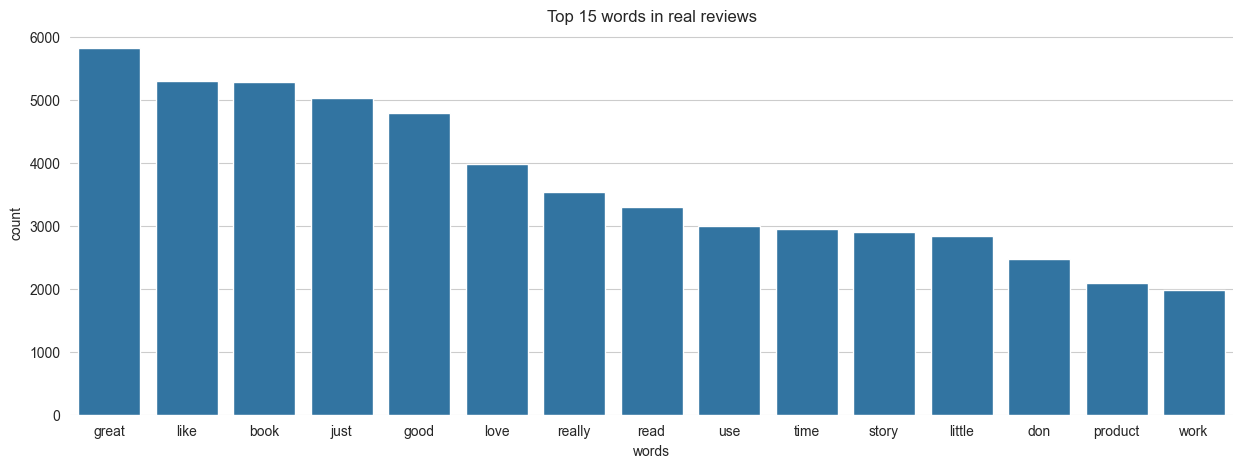

In [47]:


plt.figure(figsize=(15,5))
plt.title('Top 15 words in real reviews')
sns.barplot(x='words', y='count', data=pd.DataFrame(top_words_real, columns=['words', 'count']))
sns.despine(left=True, bottom=True)


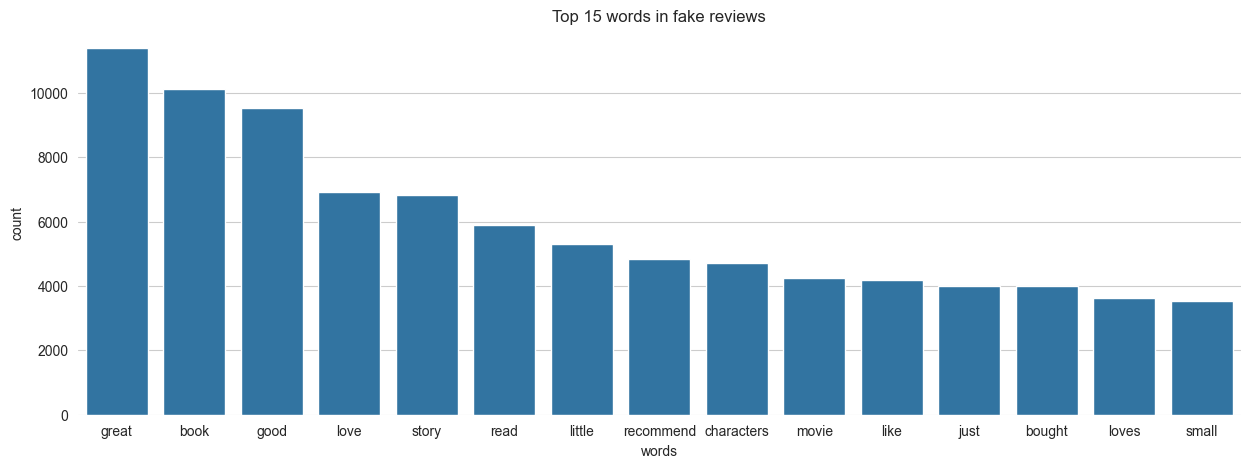

In [48]:
plt.figure(figsize=(15,5))
plt.title('Top 15 words in fake reviews')
sns.barplot(x='words', y='count', data=pd.DataFrame(top_words_fake, columns=['words', 'count']))
sns.despine(left=True, bottom=True)

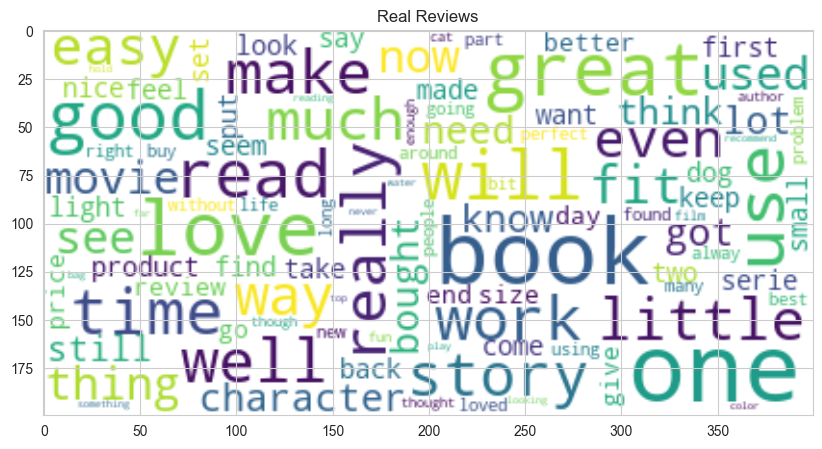

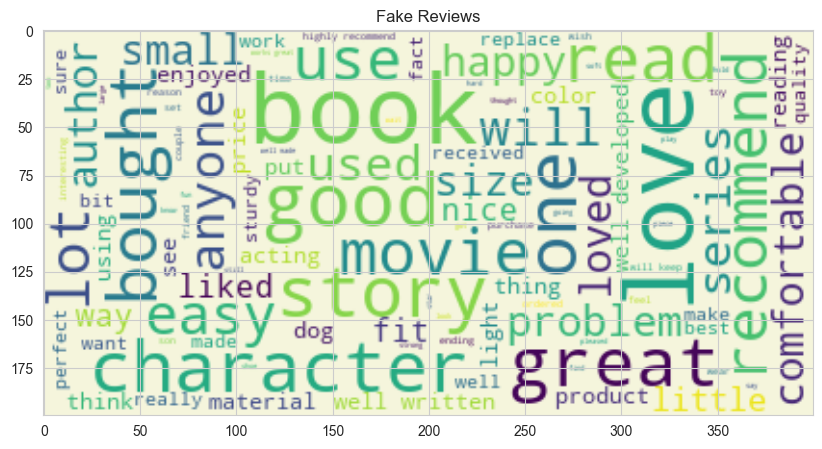

In [60]:
worldcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(' '.join(real_text))

plt.figure(figsize=(15,5))
plt.title('Real Reviews')
plt.imshow(worldcloud, interpolation="bilinear")

worldcloud = WordCloud(max_font_size=50, max_words=100, background_color="beige").generate(' '.join(fake_text))

plt.figure(figsize=(15,5))
plt.title('Fake Reviews')
plt.imshow(worldcloud, interpolation="bilinear")
